In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\ShrutiJain\Downloads\Waste_management_project\data\processed\processed_data.csv', index_col=False)
df.head()

,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Capacity (Tons),Year,City/District_Ahmedabad,City/District_Allahabad,...,Landfill Name_Pune Landfill,Landfill Name_Rajkot Landfill,Landfill Name_Ranchi Landfill,Landfill Name_Surat Landfill,Landfill Name_Thiruvananthapuram Landfill,Landfill Name_Vadodara Landfill,Landfill Name_Varanasi Landfill,Landfill Name_Visakhapatnam Landfill,Latitude,Longitude
0,6610,68,11191,9,3056,14,45575,2019,0,0,...,0,0,0,0,0,0,0,0,22.4265,77.4931
1,1181,56,11191,5,2778,12,45575,2019,0,0,...,0,0,0,0,0,0,0,0,22.4265,77.4931
2,8162,53,11191,8,3390,13,45575,2019,0,0,...,0,0,0,0,0,0,0,0,22.4265,77.4931
3,8929,56,11191,5,1498,14,45575,2019,0,0,...,0,0,0,0,0,0,0,0,22.4265,77.4931
4,5032,44,11191,7,2221,16,45575,2019,0,0,...,0,0,0,0,0,0,0,0,22.4265,77.4931


In [4]:
from sklearn.model_selection import train_test_split
X = df[['Waste Generated (Tons/Day)', 'Population Density (People/km²)','Municipal Efficiency Score (1-10)', 
       'Cost of Waste Management (₹/Ton)','Awareness Campaigns Count','Landfill Capacity (Tons)','Year']]
y = df['Recycling Rate (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
X_train.shape, X_test.shape

((680, 7), (170, 7))

In [6]:
! pip install xgboost

In [7]:
# model training-- taking different regressor model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

lr = Ridge(random_state = 42)
dt = DecisionTreeRegressor(criterion='squared_error',max_depth=3, random_state = 42)
rf = RandomForestRegressor(n_estimators=100,random_state = 42, min_samples_split = 2 , min_samples_leaf = 1 )
xgb = XGBRegressor(n_estimators=100, learning_rate=0.2, verbose=0,random_state = 42)


lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

print("MSE of Ridge- ", root_mean_squared_error(y_test,y_pred_lr))
print("MSE of DecisionTreeRegressor- ", root_mean_squared_error(y_test,y_pred_dt))
print("MSE of RandomForestRegressor- ",root_mean_squared_error(y_test, y_pred_rf))
print("MSE of XGBoost- ", root_mean_squared_error(y_test,y_pred_xgb))

MSE of Ridge-  16.513874882031576
MSE of DecisionTreeRegressor-  17.010907536541808
MSE of RandomForestRegressor-  17.822450679839015
MSE of XGBoost-  19.901103403874014


In [8]:
# now doing hyperparameter tuning
parameter_lr = {
    'alpha':[0.1, 0.2, 0.5, 1.0, 2.0],
    'max_iter': [5, 6, 7, 8]
}

parameter_dt={
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [2,3,4,5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1,2,3]
    
}

parameter_rf = {
    'n_estimators': [50, 60, 70, 100],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth' : [2,3,4,5]
}

parameter_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 1.0],
    'max_depth' : [2,3],
     'gamma': [0.01, 0.05, 0.1, 0.2, 1.0]
}

In [9]:
from sklearn.model_selection import GridSearchCV
clf_lr = GridSearchCV(lr, param_grid = parameter_lr, cv=5, verbose=3)
clf_dt = GridSearchCV(dt, param_grid = parameter_dt, cv=5, verbose=3)
clf_rf = GridSearchCV(rf, param_grid = parameter_rf, cv=5, verbose=3)
clf_xgb = GridSearchCV(xgb, param_grid = parameter_xgb, cv=5,  verbose=3)

In [10]:
clf_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ............alpha=0.1, max_iter=5;, score=-0.036 total time=   0.0s
[CV 2/5] END ............alpha=0.1, max_iter=5;, score=-0.061 total time=   0.0s
[CV 3/5] END ............alpha=0.1, max_iter=5;, score=-0.037 total time=   0.0s
[CV 4/5] END ............alpha=0.1, max_iter=5;, score=-0.076 total time=   0.0s
[CV 5/5] END ............alpha=0.1, max_iter=5;, score=-0.019 total time=   0.0s
[CV 1/5] END ............alpha=0.1, max_iter=6;, score=-0.036 total time=   0.0s
[CV 2/5] END ............alpha=0.1, max_iter=6;, score=-0.061 total time=   0.0s
[CV 3/5] END ............alpha=0.1, max_iter=6;, score=-0.037 total time=   0.0s
[CV 4/5] END ............alpha=0.1, max_iter=6;, score=-0.076 total time=   0.0s
[CV 5/5] END ............alpha=0.1, max_iter=6;, score=-0.019 total time=   0.0s
[CV 1/5] END ............alpha=0.1, max_iter=7;, score=-0.036 total time=   0.0s
[CV 2/5] END ............alpha=0.1, max_iter=7;

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1.0, 2.0],
                         'max_iter': [5, 6, 7, 8]},
             verbose=3)

In [11]:
clf_dt.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.062 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.024 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.058 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.067 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.014 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.047 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2, spl

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=3, random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'splitter': ['best', 'random']},
             verbose=3)

In [12]:
clf_rf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END criterion=squared_error, max_depth=2, n_estimators=50;, score=-0.041 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, n_estimators=50;, score=-0.043 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, n_estimators=50;, score=-0.020 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2, n_estimators=50;, score=-0.044 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2, n_estimators=50;, score=-0.026 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=2, n_estimators=60;, score=-0.043 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, n_estimators=60;, score=-0.049 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, n_estimators=60;, score=-0.024 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2, n_estimators=60;, score=-0.043 total time=   0.0s
[CV 5/5] END criterion=square

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 60, 70, 100]},
             verbose=3)

In [13]:
clf_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=50;, score=-0.018 total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=50;, score=-0.026 total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=50;, score=-0.009 total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=50;, score=-0.023 total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=50;, score=-0.024 total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=100;, score=-0.026 total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=100;, score=-0.028 total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=100;, score=-0.012 total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [0.01, 0.05, 0.1, 0.2, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 1.0],
                         'max_depth': [2, 3], 'n_estimators': [50, 100]},
             verbose=3)

In [14]:
print("Ridge Regression")
print(clf_lr.best_params_)
y_pred_clf_lr = clf_lr.best_estimator_.predict(X_test)
print(root_mean_squared_error(y_test, y_pred_clf_lr))

Ridge Regression
{'alpha': 2.0, 'max_iter': 5}
16.51387424231775


In [15]:
print("DecisionTree Regression")
print(clf_dt.best_params_)
y_pred_clf_dt = clf_dt.best_estimator_.predict(X_test)
print(root_mean_squared_error(y_test, y_pred_clf_dt))

DecisionTree Regression
{'criterion': 'absolute_error', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
17.062644095491525


In [16]:
print("RandomForest Regression")
print(clf_rf.best_params_)
y_pred_clf_rf = clf_rf.best_estimator_.predict(X_test)
print(root_mean_squared_error(y_test, y_pred_clf_rf))

RandomForest Regression
{'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 50}
16.541781751369154


In [17]:
print("XGBoost Regression")
print(clf_xgb.best_params_)
y_pred_clf_xgb = clf_xgb.best_estimator_.predict(X_test)
print(root_mean_squared_error(y_test, y_pred_clf_xgb))

XGBoost Regression
{'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}
16.511110218280436


In [18]:
import joblib
joblib.dump(clf_xgb, r'C:\Users\ShrutiJain\Downloads\Waste_management_project\models\trained_model.pkl')

['C:\\Users\\ShrutiJain\\Downloads\\Waste_management_project\\models\\trained_model.pkl']

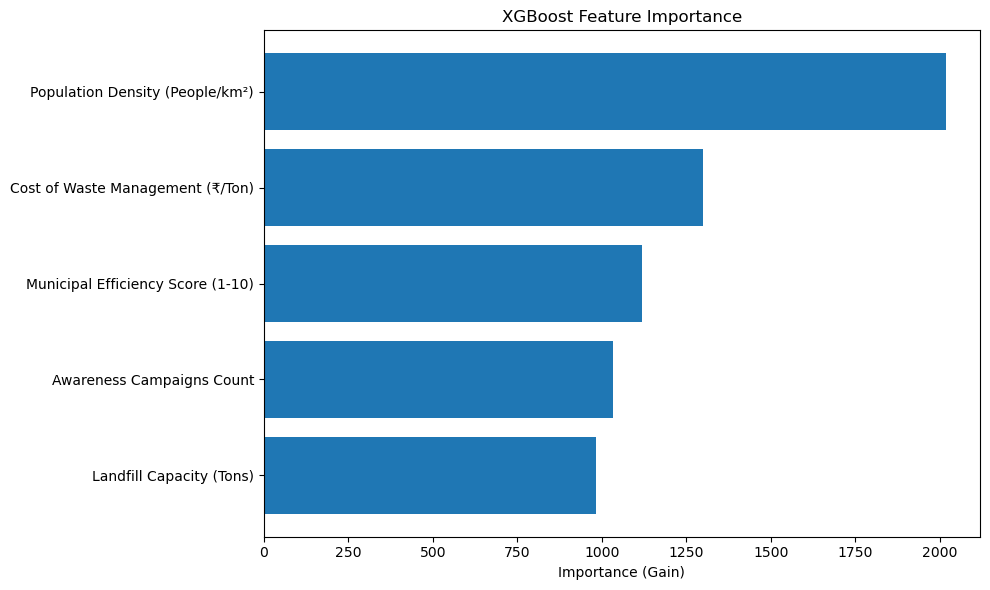

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Get best XGBoost model from GridSearchCV
best_model = clf_xgb.best_estimator_

# Get feature importance (gain)
importance = best_model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance (Gain)")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

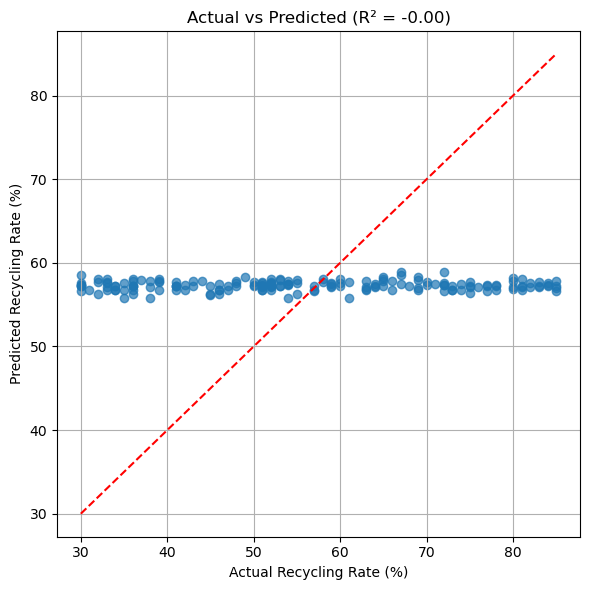

In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_clf_xgb)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_clf_xgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Recycling Rate (%)')
plt.ylabel('Predicted Recycling Rate (%)')
plt.title(f'Actual vs Predicted (R² = {r2:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()